<a href="https://colab.research.google.com/github/Harsh-KH-6/Tata-Group-AI-Collections-Simulation/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
uploaded = files.upload()


Saving Delinquency_prediction_dataset.csv to Delinquency_prediction_dataset.csv


In [12]:
import pandas as pd

df = pd.read_csv('Delinquency_prediction_dataset.csv')  # Replace with actual filename
df.head()


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [31]:
total_records = len(df)
print(total_records)


436


In [13]:
# Shape and info
print(df.shape)
df.info()

# Basic statistics
df.describe()

# Check for missing values
df.isnull().sum()


(500, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3      

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


In [14]:
# Drop rows or fill missing values
df = df.dropna()  # OR use df.fillna()

# Standardize column names (optional)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Encode categorical features
df['employment_status'] = df['employment_status'].str.lower().str.strip()

# Label encoding or one-hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['employment_status', 'credit_card_type', 'location']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


<ipython-input-14-a150626fceeb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_status'] = df['employment_status'].str.lower().str.strip()


In [15]:
# Define X (features) and y (target)
X = df.drop(columns=['customer_id', 'delinquent_account'])  # Features
y = df['delinquent_account']  # Target


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [19]:
# Check data types
print(X_train.dtypes)



age                       int64
income                  float64
credit_score            float64
credit_utilization      float64
missed_payments           int64
loan_balance            float64
debt_to_income_ratio    float64
employment_status         int64
account_tenure            int64
credit_card_type          int64
location                  int64
month_1                  object
month_2                  object
month_3                  object
month_4                  object
month_5                  object
month_6                  object
dtype: object


In [20]:
# Combine train and test temporarily to ensure consistent encoding
combined = pd.concat([X_train, X_test])

# Get dummy variables
combined_encoded = pd.get_dummies(combined)

# Split back into train and test
X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Handle categorical features
combined = pd.concat([X_train, X_test])
combined_encoded = pd.get_dummies(combined)

X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]

# Fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train_encoded)

# Predict
y_pred = model.predict(X_test_encoded)

# Decode predictions back to original labels (optional)
y_pred_labels = le.inverse_transform(y_pred)

# Evaluate
print(classification_report(y_test, y_pred_labels))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95        79
           1       0.00      0.00      0.00         9

    accuracy                           0.90        88
   macro avg       0.45      0.50      0.47        88
weighted avg       0.81      0.90      0.85        88



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


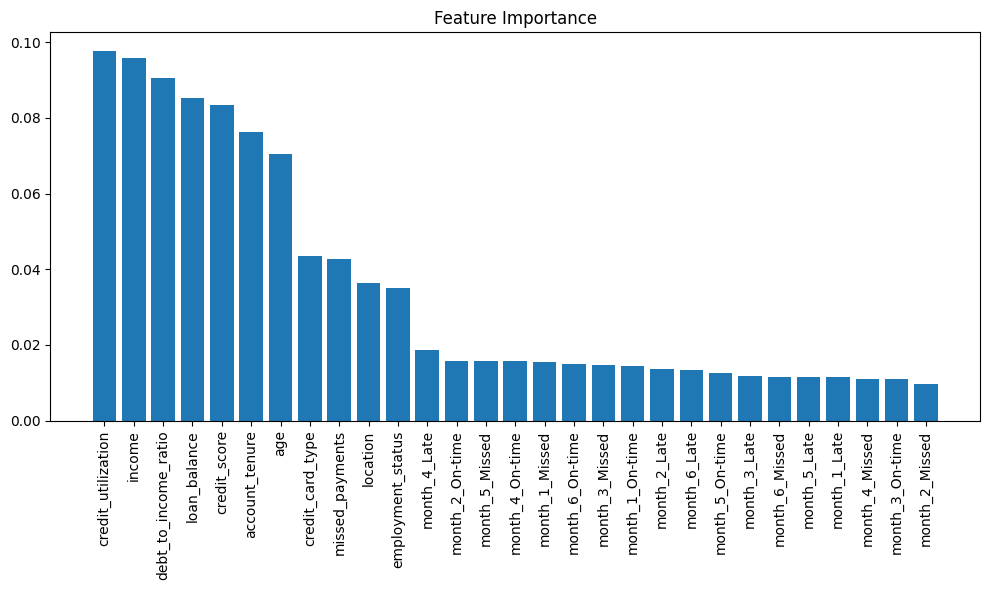

In [22]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X_train_encoded.columns

# Sort and plot
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3)
grid.fit(X_train_encoded, y_train_encoded)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
print(df.columns.tolist())


['customer_id', 'age', 'income', 'credit_score', 'credit_utilization', 'missed_payments', 'delinquent_account', 'loan_balance', 'debt_to_income_ratio', 'employment_status', 'account_tenure', 'credit_card_type', 'location', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']


In [27]:
payment_map = {'On-time': 0, 'Late': 1, 'Missed': 2}
payment_cols = ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']

for col in payment_cols:
    df[col] = df[col].map(payment_map)


In [29]:
# Summary of all columns
print(df.describe(include='all'))

# Categorical example
print(df['employment_status'].value_counts())



       customer_id        age         income  credit_score  \
count          436  436.00000     436.000000    436.000000   
unique         436        NaN            NaN           NaN   
top       CUST0500        NaN            NaN           NaN   
freq             1        NaN            NaN           NaN   
mean           NaN   46.12156  108541.541284    578.837156   
std            NaN   16.06943   53449.583975    167.833918   
min            NaN   18.00000   15404.000000    302.000000   
25%            NaN   33.00000   64265.250000    418.250000   
50%            NaN   46.00000  107658.000000    591.000000   
75%            NaN   59.00000  155563.750000    725.000000   
max            NaN   74.00000  199943.000000    847.000000   

        credit_utilization  missed_payments  delinquent_account  loan_balance  \
count           436.000000       436.000000          436.000000    436.000000   
unique                 NaN              NaN                 NaN           NaN   
top         

In [30]:
import joblib

# Save model
joblib.dump(model, 'delinquency_model.pkl')

# Load later
# model = joblib.load('delinquency_model.pkl')


['delinquency_model.pkl']